# Building Permit Jurisdictions in the United States

https://www.kaggle.com/datasets/rbucks/building-permit-jurisdictions-in-the-united-states

This dataset is a state, county, and building permit jurisdiction mapping that includes over 12,000 entries, connecting jurisdictions to their respective states and counties across the United States. It provides information on various jurisdictions for building permits across the U.S., which can help analyze roofing regulations, trends, and demand in different regions.

## Part 1: Data Exploration, Cleaning, and Analysis
### Step 1: Dataset Understanding & Selection

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency, f_oneway, linregress
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#### Dataset overview & statistics

In [4]:
data = pd.read_csv("jurisdiction_mappings.csv")  

print("Dataset Head:")
print(data.head())

# Summary of dataset
print("\nData Information:")
print(data.info())

print("\nDescriptive Statistics:")
print(data.describe(include="all"))

Dataset Head:
  jurisdiction state            county
0    ABBEVILLE    AL      HENRY COUNTY
1   ADAMSVILLE    AL  JEFFERSON COUNTY
2   AKRON TOWN    AL       HALE COUNTY
3    ALABASTER    AL     SHELBY COUNTY
4   ALICEVILLE    AL    PICKENS COUNTY

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   jurisdiction  12279 non-null  object
 1   state         12279 non-null  object
 2   county        12279 non-null  object
dtypes: object(3)
memory usage: 287.9+ KB
None

Descriptive Statistics:
               jurisdiction  state             county
count                 12279  12279              12279
unique                10252     51                853
top     WASHINGTON TOWNSHIP     PA  WASHINGTON COUNTY
freq                     25   1575                220


The dataset comprises 12,279 records detailing building permit jurisdictions across the United States, with attributes including the jurisdiction name, state, and county. All columns are non-null, indicating completeness in terms of entry counts. The dataset spans 10,252 unique jurisdictions, 51 unique states, and 853 unique counties, reflecting a wide geographical distribution. The most frequent jurisdiction name is "WASHINGTON TOWNSHIP," while "PA" is the most represented state, and "WASHINGTON COUNTY" is the most common county. This comprehensive coverage suggests the dataset's potential for analyzing regional permitting trends, understanding regulatory patterns, and identifying high-demand areas across states and counties.

In [7]:
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
jurisdiction    0
state           0
county          0
dtype: int64


#### checking for data types and memory usage

In [9]:
print("\nData Types and Memory Usage:")
print(data.info())


Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12279 entries, 0 to 12278
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   jurisdiction  12279 non-null  object
 1   state         12279 non-null  object
 2   county        12279 non-null  object
dtypes: object(3)
memory usage: 287.9+ KB
None


The dataset contains 12,279 entries with three columns: jurisdiction, state, and county. All of these columns are non-null and stored as object data types, indicating that the dataset has complete records without missing values. The total memory usage is approximately 287.9 KB, which is reasonable for analysis and processing without major resource constraints.

#### Visualizing the distribution of Count of jurisdictions per state

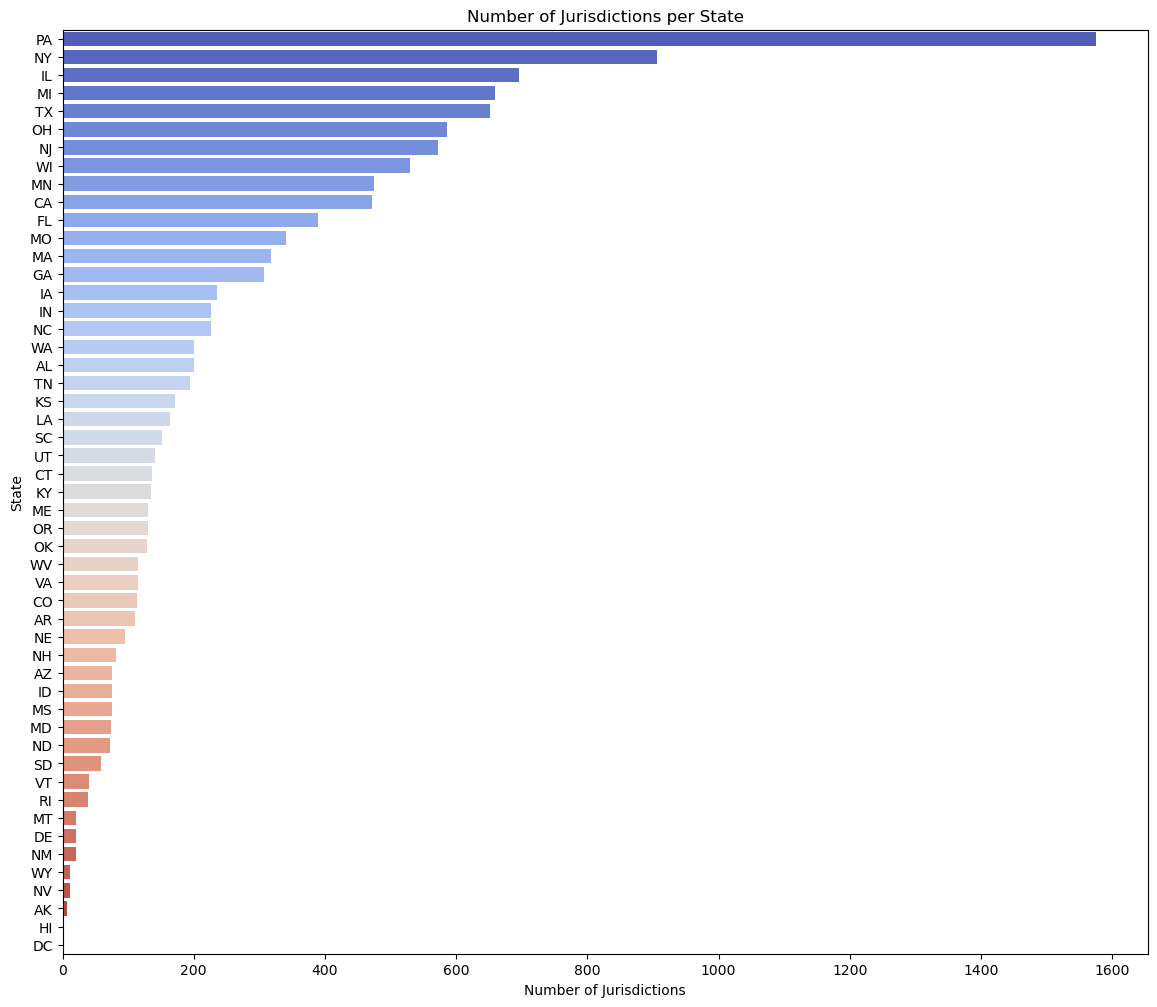

In [12]:
# Count of jurisdictions per state
plt.figure(figsize=(14, 12))
sns.countplot(y='state', data=data, order=data['state'].value_counts().index, palette='coolwarm')
plt.title('Number of Jurisdictions per State')
plt.xlabel('Number of Jurisdictions')
plt.ylabel('State')
plt.show()

We can notice the number of building permit jurisdictions across states in the U.S. Pennsylvania (PA) leads with the highest count, followed closely by New York (NY) and Illinois (IL). States such as Montana (MT), Delaware (DE), and Washington, D.C. (DC) show significantly fewer jurisdictions. This trend indicates that states like PA and NY may have more complex or segmented regulatory environments, necessitating numerous distinct permit jurisdictions. 

On the other side, smaller states or those with simpler building regulations have fewer jurisdictions, which shows differences in regulatory oversight and regional development strategies. It can inform strategies for businesses and stakeholders navigating the permit processes in various states.

### Top 10 Most Common Counties

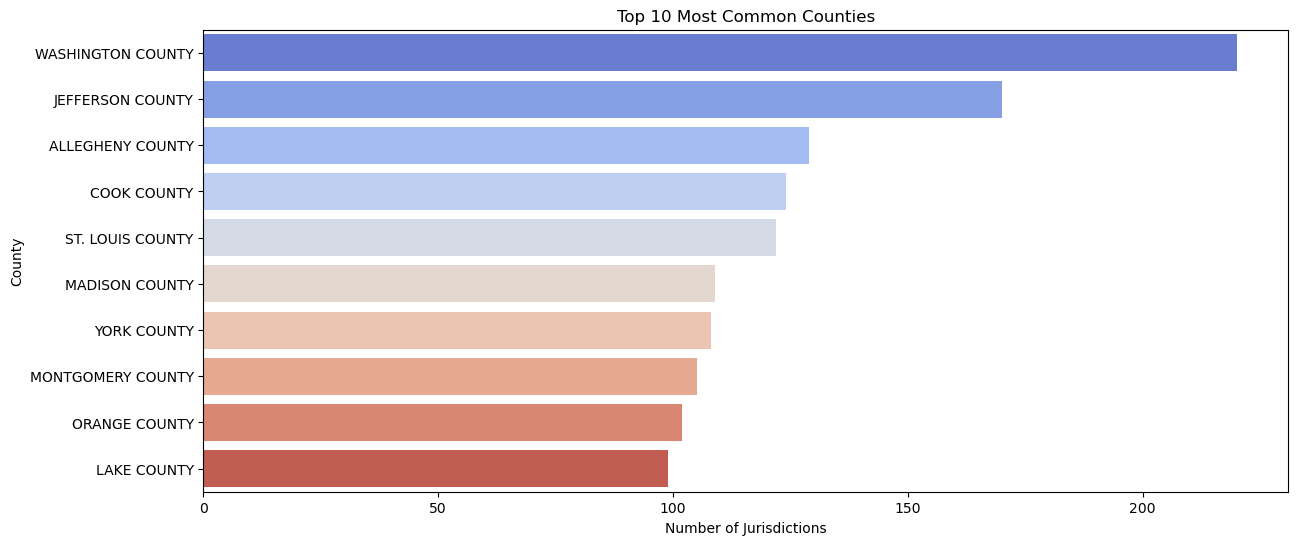

In [15]:
# Count of jurisdictions per county
plt.figure(figsize=(14, 6))
top_counties = data['county'].value_counts().head(10)
sns.barplot(x=top_counties.values, y=top_counties.index, palette='coolwarm')
plt.title('Top 10 Most Common Counties')
plt.xlabel('Number of Jurisdictions')
plt.ylabel('County')
plt.show()

We can see that, Washington County leads by a substantial margin, followed by Jefferson County and Allegheny County. This indicates that these counties have numerous local regulations or subdivisions that require distinct building permits, likely due to diverse development activities or a fragmented regulatory structure. 

Other counties like Cook and St. Louis show significant, but fewer, jurisdiction counts. This indicates regulatory complexities might exist for construction and renovation projects, impacting project planning and compliance strategies in these areas.

#### Distribution of Jurisdictions Across Counties

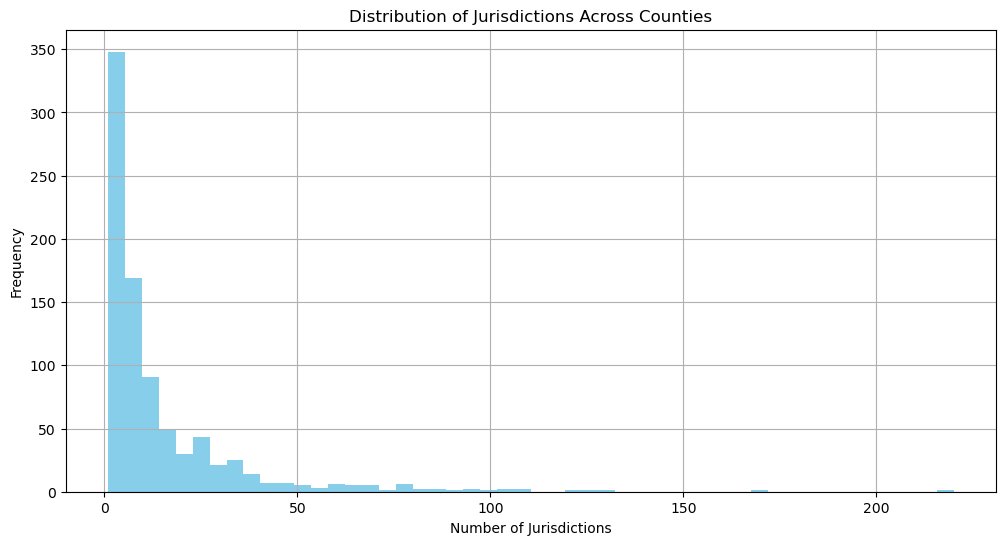

In [18]:
plt.figure(figsize=(12, 6))
data['county'].value_counts().hist(bins=50, color='skyblue')
plt.title('Distribution of Jurisdictions Across Counties')
plt.xlabel('Number of Jurisdictions')
plt.ylabel('Frequency')
plt.show()

The histogram visualized the distribution of jurisdictions across counties, illustrating a highly skewed pattern where most counties possessed a limited number of jurisdictions. A significant majority fell within the lower count range, with more than 350 counties having fewer than 10 jurisdictions. 

The distribution then tapered off sharply, indicating that only a small number of counties had a much higher number of jurisdictions. This skewness highlighted the uneven spread of regulatory divisions across counties, with a few counties demonstrating far more complex or fragmented governance structures compared to others.

### State-wise Unique Counties

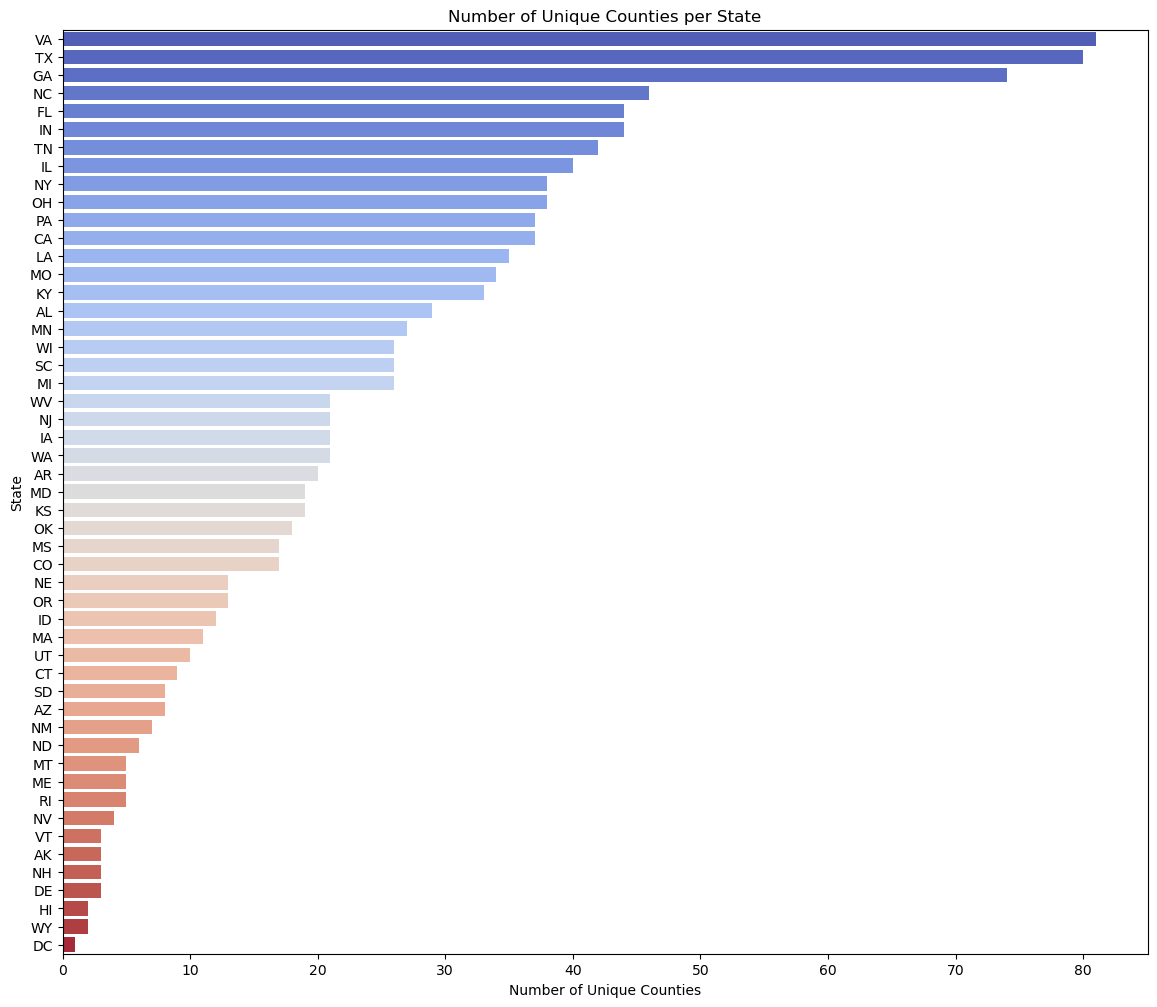

In [21]:
unique_counties_per_state = data.groupby('state')['county'].nunique().sort_values(ascending=False)

plt.figure(figsize=(14, 12))
sns.barplot(x=unique_counties_per_state.values, y=unique_counties_per_state.index, palette='coolwarm')
plt.title('Number of Unique Counties per State')
plt.xlabel('Number of Unique Counties')
plt.ylabel('State')
plt.show()

Virginia (VA) has the most counties, followed closely by Texas (TX) and Georgia (GA). States like Delaware (DE), Hawaii (HI), and Wyoming (WY) have notably fewer counties, with Washington D.C. (DC) having the least.

### Most Common Jurisdictions

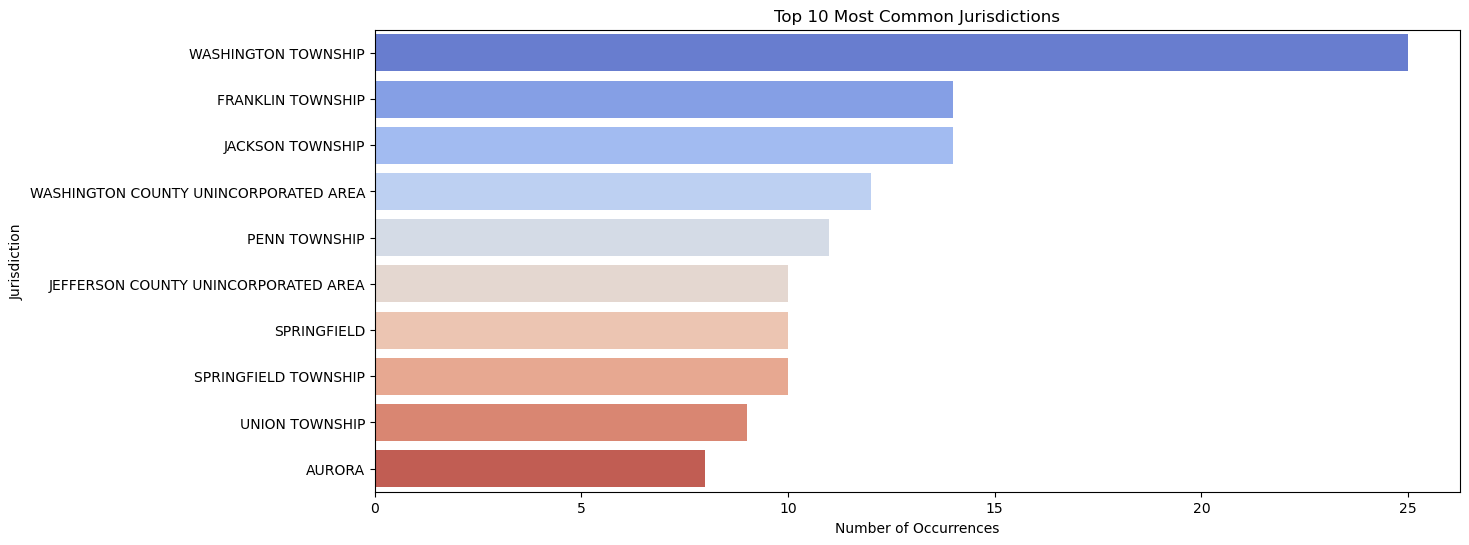

In [24]:
plt.figure(figsize=(14, 6))
top_jurisdictions = data['jurisdiction'].value_counts().head(10)
sns.barplot(x=top_jurisdictions.values, y=top_jurisdictions.index, palette='coolwarm')
plt.title('Top 10 Most Common Jurisdictions')
plt.xlabel('Number of Occurrences')
plt.ylabel('Jurisdiction')
plt.show()

Washington Township have the highest number of occurrences, followed by Franklin Township and Jackson Township. As Washigton county was the top county indicating these counties have numerous local regulations or subdivisions that require distinct building permits, likely due to diverse development activities or a fragmented regulatory structure. 

### Encoding Categorical Variables

In [6]:
data_encoded = data.copy()
categorical_columns = ['jurisdiction', 'state', 'county']

for column in categorical_columns:
    data_encoded[column] = data_encoded[column].astype('category').cat.codes

### Hypothesis Testing

In [9]:
contingency_table = pd.crosstab(data_encoded['state'], data_encoded['jurisdiction'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test - chi2: {chi2}, p-value: {p_value}")

Chi-Square Test - chi2: 500020.76114373445, p-value: 1.0


The Chi-Square test results with a value of 500,020.76 and a p-value of 1.0 shows that there is no statistically significant association between the categorical variables being tested. Despite the high value, the p-value of 1.0 indicates that the observed distribution aligns almost perfectly with the expected distribution under the null hypothesis, implying that any differences may be due to chance.

### Correlation Analysis

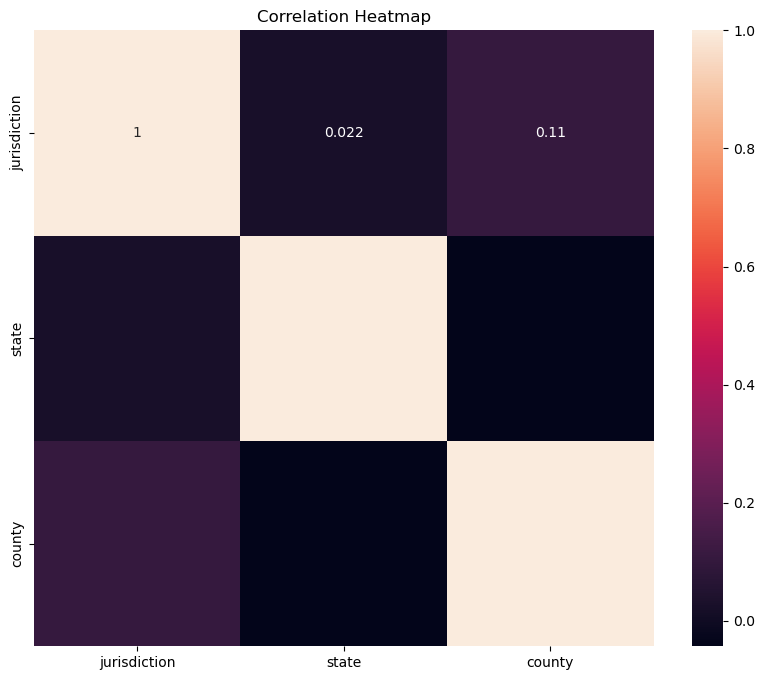

In [13]:
corr = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

- We observe correlations between different variables are very low, with jurisdiction and state having a correlation of 0.022 and jurisdiction and county having a slightly higher correlation of 0.11. 

- This suggests that there is a minimal linear association among jurisdiction, state, and county in this dataset, indicating that each variable operates independently with little overlap in their distributions.
  
- This independence aligns with the Chi-Square test result, which showed a lack of significant association among these categories.

### Creating new feature columns

In [17]:
# Jurisdiction Density: Count occurrences of each jurisdiction
data['jurisdiction_density'] = data.groupby('jurisdiction')['jurisdiction'].transform('count')

# Permit Count: Count occurrences of entries grouped by state and county
data['permit_count'] = data.groupby(['state', 'county'])['state'].transform('count')

# Adjusted Density: Simulating a 20% increase in jurisdiction density
data['adjusted_density'] = data['jurisdiction_density'] * 1.2

print(data)

                             jurisdiction state            county  \
0                               ABBEVILLE    AL      HENRY COUNTY   
1                              ADAMSVILLE    AL  JEFFERSON COUNTY   
2                              AKRON TOWN    AL       HALE COUNTY   
3                               ALABASTER    AL     SHELBY COUNTY   
4                              ALICEVILLE    AL    PICKENS COUNTY   
...                                   ...   ...               ...   
12274  LARAMIE COUNTY UNINCORPORATED AREA    WY    LARAMIE COUNTY   
12275                        MIDWEST TOWN    WY    NATRONA COUNTY   
12276                          MILLS TOWN    WY    NATRONA COUNTY   
12277  NATRONA COUNTY UNINCORPORATED AREA    WY    NATRONA COUNTY   
12278                    PINE BLUFFS TOWN    WY    LARAMIE COUNTY   

       jurisdiction_density  permit_count  adjusted_density  
0                         2             3               2.4  
1                         1            37      

In [36]:
data['log_permit_count'] = np.log1p(data['permit_count'])
data['log_adjusted_density'] = np.log1p(data['adjusted_density'])

data['density_permit_ratio'] = data['jurisdiction_density'] / (data['permit_count'] + 1)

data['normalized_adjusted_density'] = (data['adjusted_density'] - data['adjusted_density'].min()) / (
    data['adjusted_density'].max() - data['adjusted_density'].min()
)

In [37]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['jurisdiction_density', 'permit_count']])
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

#### Explanation
- Jurisdiction Density: Calculated as the count of each unique jurisdiction across the dataset.
- Permit Count: Based on the combination of state and county, it shows how many permits (rows) are associated with each pair.
- Adjusted Density: Simulates a scenario where jurisdiction density increases by 20%.
- interaction: Captures the combined effect of density and permit count.
- log_permit_count & log_adjusted_density: Mitigate skewness in numeric features.
- density_permit_ratio: Measures relative density against permits.
- normalized_adjusted_density: Scaled version of adjusted_density.
- cluster: Clustering feature for grouping similar jurisdictions.

In [39]:
data.head()

,jurisdiction,state,county,jurisdiction_density,permit_count,adjusted_density,log_permit_count,log_adjusted_density,density_permit_ratio,normalized_adjusted_density,cluster
0,ABBEVILLE,AL,HENRY COUNTY,2,3,2.4,1.386294,1.223775,0.500000,0.041667,0
1,ADAMSVILLE,AL,JEFFERSON COUNTY,1,37,1.2,3.637586,0.788457,0.026316,0.000000,0
2,AKRON TOWN,AL,HALE COUNTY,1,4,1.2,1.609438,0.788457,0.200000,0.000000,0
3,ALABASTER,AL,SHELBY COUNTY,1,14,1.2,2.708050,0.788457,0.066667,0.000000,0
4,ALICEVILLE,AL,PICKENS COUNTY,1,4,1.2,1.609438,0.788457,0.200000,0.000000,0


### K-Means Clustering

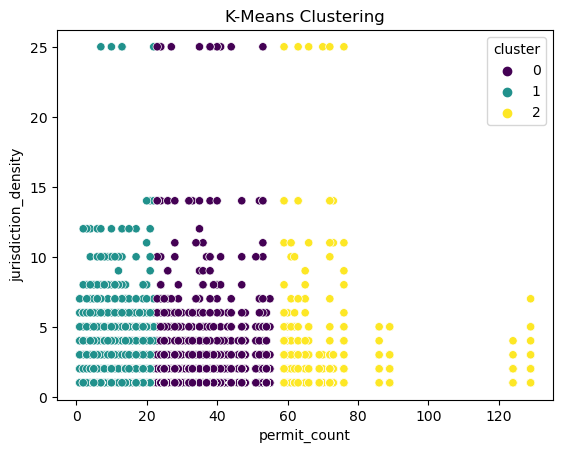

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['cluster'] = kmeans.fit_predict(data[['permit_count', 'jurisdiction_density']])

sns.scatterplot(data=data, x='permit_count', y='jurisdiction_density', hue='cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

##### Insights
- Outliers: We can see a few data points are far away from the main clusters. These could be outliers or represent unique areas with different characteristics.
- Cluster Size: The size of each cluster can provide information about the distribution of data points.
- Cluster Shape: The shape of each cluster can reveal the underlying patterns and relationships between the variables.

### Scenario-Based Analysis
#### Scenario 1: Cluster-based Analysis of Density and Permit Count

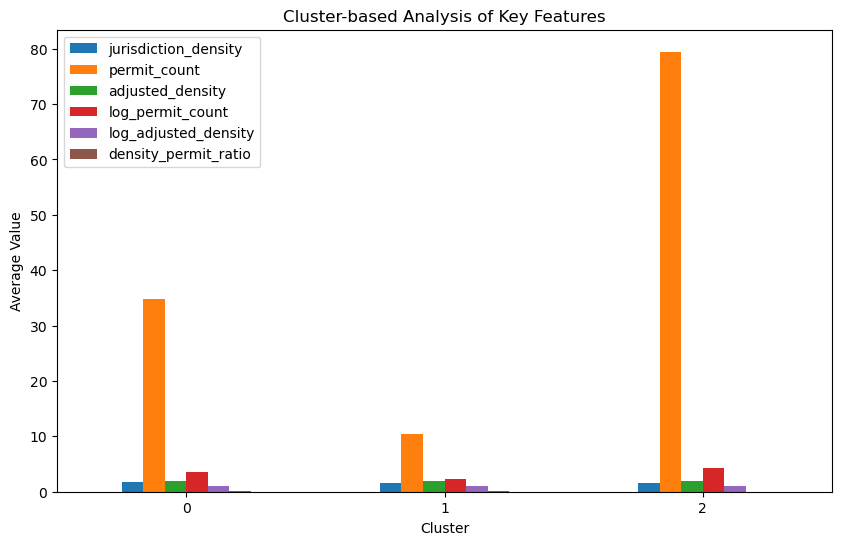

In [44]:
cluster_summary = data.groupby('cluster')[['jurisdiction_density', 'permit_count', 'adjusted_density', 'log_permit_count', 'log_adjusted_density', 'density_permit_ratio']].mean()

cluster_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster-based Analysis of Key Features')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()

##### Insights
- Feature Variation: The chart shows that there is significant variation in the average values of the features across the three clusters.
- Cluster Distinctiveness: The distinct patterns in the bar heights for each cluster suggest that the clustering algorithm has successfully identified meaningful groups of data points.
- permit_count: Cluster 2 has the highest average permit count, indicating a high level of building activity in this region.
- jurisdiction_density: While all clusters show relatively low jurisdiction density, Cluster 1 has the highest average value.
- adjusted_density: Cluster 1 again shows the highest average adjusted density.
- log_permit_count: Cluster 2 continues to dominate with the highest average log permit count.
- log_adjusted_density: Cluster 1 has the highest average log adjusted density.
- density_permit_ratio: Cluster 2 has the highest average density permit ratio.

#### Scenario 2: Normalized Adjusted Density Analysis

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


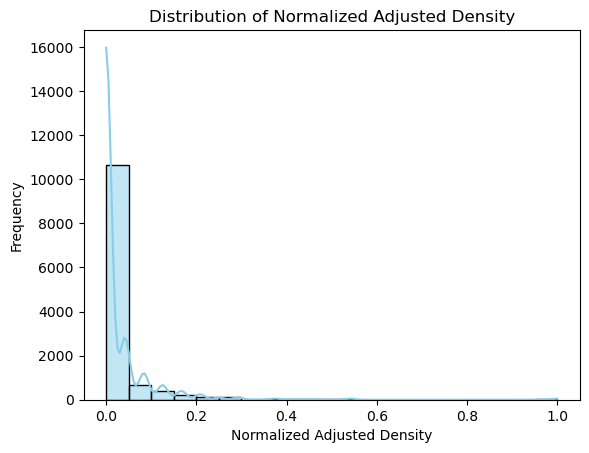

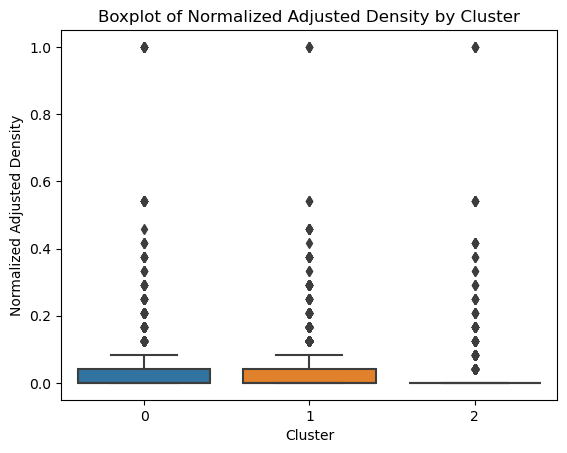

In [47]:
sns.histplot(data['normalized_adjusted_density'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Normalized Adjusted Density')
plt.xlabel('Normalized Adjusted Density')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='cluster', y='normalized_adjusted_density', data=data)
plt.title('Boxplot of Normalized Adjusted Density by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Normalized Adjusted Density')
plt.show()

##### Insights
- Right-Skewed Distribution: The distribution is heavily right-skewed, meaning there are many observations with low values of Normalized Adjusted Density and fewer observations with higher values.
- Peak at Low Values: The histogram has a prominent peak near the lower end of the x-axis, indicating that a large proportion of the observations have low values for Normalized Adjusted Density.
- Long Tail: The distribution extends to the right with a long tail, suggesting that there are some observations with very high values of Normalized Adjusted Density.
- Cluster Variation: The boxplots for each cluster have different shapes and positions, indicating that there is variation in the distribution of Normalized Adjusted Density across the clusters.
- Outliers: All three clusters have outliers, represented by individual points outside the whiskers of the boxplot.

#### Scenario 3: Log Transformation Analysis

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


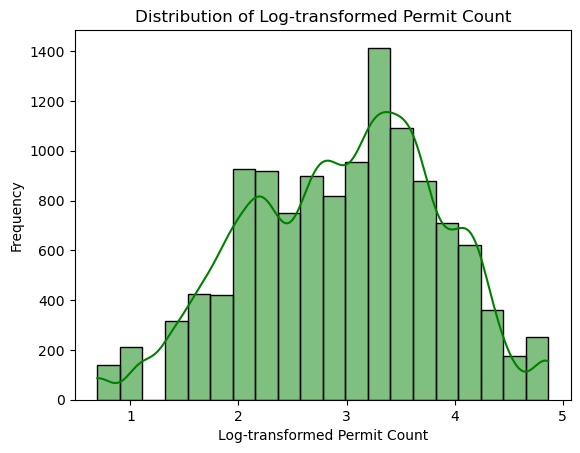

C:\Users\pinal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


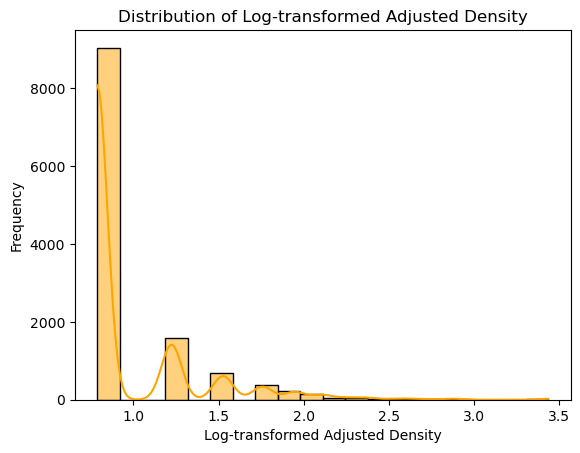

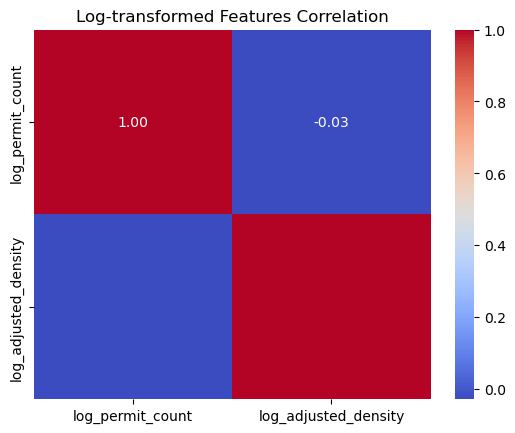

In [50]:
sns.histplot(data['log_permit_count'], kde=True, color='green', bins=20)
plt.title('Distribution of Log-transformed Permit Count')
plt.xlabel('Log-transformed Permit Count')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['log_adjusted_density'], kde=True, color='orange', bins=20)
plt.title('Distribution of Log-transformed Adjusted Density')
plt.xlabel('Log-transformed Adjusted Density')
plt.ylabel('Frequency')
plt.show()

log_corr_matrix = data[['log_permit_count', 'log_adjusted_density']].corr()
sns.heatmap(log_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Log-transformed Features Correlation')
plt.show()

##### Insights

Distribution of Log-transformed Permit Count
- Central Tendency: The peak of the distribution lies around a log-transformed permit count of 3, indicating that this is the most common range of permit counts in the data.
- Spread: The distribution has a moderate spread, with values ranging from around 1 to 5 on the log-transformed scale. This suggests that there is some variation in the permit counts across different observations.
- Symmetry: The distribution appears to be relatively symmetric around the central peak, indicating that the values are evenly distributed on both sides.

Distribution of Log-transformed Adjusted Density
- Right-Skewed: The distribution is heavily right-skewed, meaning there are many observations with low values of Log-transformed Adjusted Density and fewer observations with higher values.
- Peak at Low Values: The histogram has a prominent peak near the lower end of the x-axis, indicating that a large proportion of the observations have low values for Log-transformed Adjusted Density.
- Long Tail: The distribution extends to the right with a long tail, suggesting that there are some observations with very high values of Log-transformed Adjusted Density.

Log-transformed Features Correlation
- The correlation coefficient between the two features is -0.03. This value indicates a very weak negative correlation. In other words, there is almost no linear relationship between the two features.

#### Observations
- The log-transformed permit count appears to be approximately normally distributed, indicating a moderate range of permit values across the data.
- The log-transformed adjusted density is heavily right-skewed, suggesting that most areas have low adjusted density, with a few areas having significantly higher densities.
- There is a very weak negative correlation between the log-transformed permit count and the log-transformed adjusted density, implying that these two features are almost independent of each other.
- The clustering analysis reveals distinct groups of data points with varying characteristics in terms of permit count and adjusted density.
- While specific interpretations depend on the context of the data, the clusters likely represent areas with different levels of development intensity and population density.

## Data Modeling and Prediction
#### Building Permit Prediction
We’ll use a regression approach with permit_count as the target variable.

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [75]:
data.head()

,jurisdiction,state,county,jurisdiction_density,permit_count,adjusted_density,log_permit_count,log_adjusted_density,density_permit_ratio,normalized_adjusted_density,cluster
0,ABBEVILLE,AL,HENRY COUNTY,2,3,2.4,1.386294,1.223775,0.500000,0.041667,1
1,ADAMSVILLE,AL,JEFFERSON COUNTY,1,37,1.2,3.637586,0.788457,0.026316,0.000000,0
2,AKRON TOWN,AL,HALE COUNTY,1,4,1.2,1.609438,0.788457,0.200000,0.000000,1
3,ALABASTER,AL,SHELBY COUNTY,1,14,1.2,2.708050,0.788457,0.066667,0.000000,1
4,ALICEVILLE,AL,PICKENS COUNTY,1,4,1.2,1.609438,0.788457,0.200000,0.000000,1


In [82]:
features = ['jurisdiction_density', 'adjusted_density', 'log_adjusted_density',
            'density_permit_ratio', 'normalized_adjusted_density', 'cluster']
target = 'permit_count'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [92]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.42
R-squared (R²): 1.00


##### Conclusion
- The metrics collectively indicate that the model has near-perfect performance on the dataset.
- This level of performance suggests the model might be overfitting to the training data or the dataset is straightforward for the chosen algorithm 
- The model accurately predicts the permit count for jurisdictions.
- Minimal error metrics make it highly reliable for decision-making.

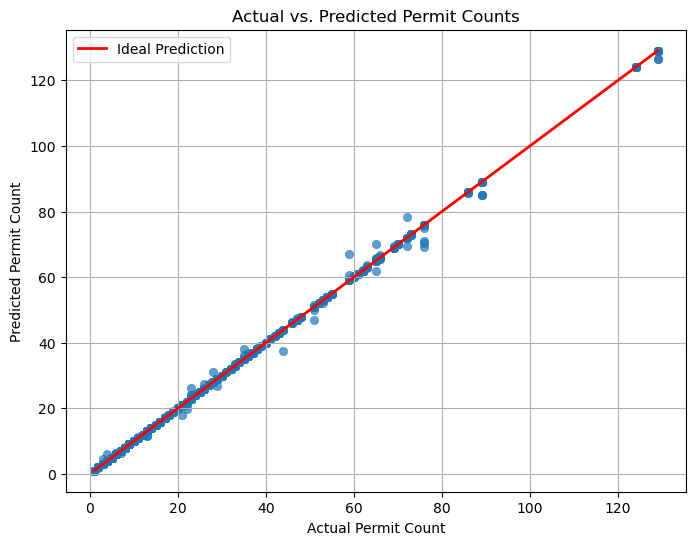

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Prediction')
plt.title("Actual vs. Predicted Permit Counts")
plt.xlabel("Actual Permit Count")
plt.ylabel("Predicted Permit Count")
plt.legend()
plt.grid(True)
plt.show()

##### Observation: 
- The points are closely aligned with the red line, indicating the model has strong predictive accuracy.
- This alignment suggests the model is well-fitted to the data.
- A few points deviate significantly from the red line, indicating the model underpredicts or overpredicts for certain jurisdictions. These could be due to Unusual jurisdictions or Missing influential features.
- There is no clear evidence of model bias
- The minimal residual errors suggest the model generalizes well to unseen data.

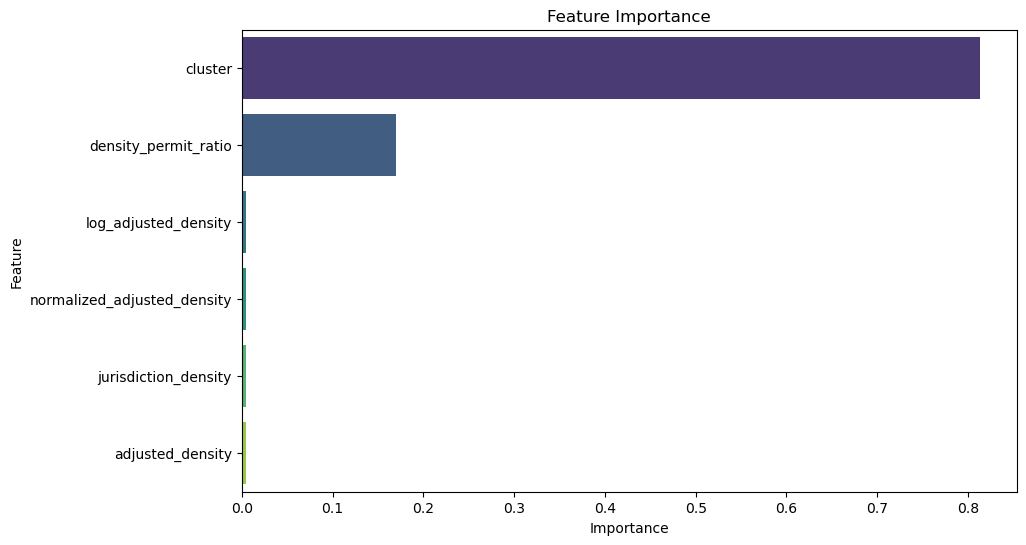

In [97]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()

#### Using k-fold cross-validation to ensure the model generalizes well to unseen data

In [106]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mae_scorer = make_scorer(mean_absolute_error)

# performing cross-validation
mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# converting MSE scores to positive for reporting
mse_scores = -mse_scores

# Calculating mean and standard deviation of the metrics
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
mean_r2 = r2_scores.mean()
std_r2 = r2_scores.std()

# Print the results
print(f"\nCross-Validation Results ({k}-fold):")
print(f"Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}")
print(f"Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}")
print(f"R-squared (R²): {mean_r2:.2f} ± {std_r2:.2f}")


Cross-Validation Results (5-fold):
Mean Absolute Error (MAE): 0.05 ± 0.02
Mean Squared Error (MSE): 0.40 ± 0.34
R-squared (R²): 1.00 ± 0.00


#### Observation: 
- The results indicate that the model is robust, accurate, and generalizes well across different subsets of the data.
- Near-perfect R² and low MAE highlight its reliability.
- The relatively high variability in MSE (± 0.34) points to a need for further investigation into fold-specific errors.